In [1]:
import pandas as pd
import os
import numpy as np

In [53]:
os.getcwd()

'C:\\Users\\Wayne\\Desktop\\Yale NUS stuff\\Y4S2\\Data Science Accelerator\\ysc4224_data_sci_accelerator\\Assignments\\Excel Files'

In [54]:
#os.chdir('./Excel Files')

# Read Excel sheet from Homework

In [4]:
df = pd.read_excel('lending_club_loans.xlsx', engine="openpyxl", header=1)


In [5]:
df_description = pd.read_excel('lending_club_loans.xlsx', engine="openpyxl", header=0, sheet_name='data_dictionary')
df_description

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [55]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Cleaning of data

In [7]:
df.isna().sum()

id                                4
member_id                         7
loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
                              ...  
tax_liens                       112
tot_hi_cred_lim               42542
total_bal_ex_mort             42542
total_bc_limit                42542
total_il_high_credit_limit    42542
Length: 115, dtype: int64

## Finding percentage null for different columns and dropping columns that have 100% null values.

In [8]:
def percentage_null(df):
    total_number_of_rows = len(df)
    return ((df.isna().sum())/total_number_of_rows)

In [9]:
df_null_percentage = percentage_null(df)

In [10]:
(df_null_percentage == 1.0).sum()

54

In [11]:
useless_col = []
for key, val in df_null_percentage.items():
    if val == 1:
        useless_col.append(key)
useless_col

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [12]:
len(useless_col)

54

In [13]:
df_useful = df.drop(useless_col, axis=1)

In [14]:
df_useful

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,70686,70681.0,5000.0,5000.0,0.0,36 months,0.0775,156.11,A,A3,...,794.0,790.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking whether the remaining columns have a high NULL proportion

In [15]:
percentage_null(df_useful)

id                          0.000094
member_id                   0.000165
loan_amnt                   0.000165
funded_amnt                 0.000165
funded_amnt_inv             0.000165
                              ...   
acc_now_delinq              0.000846
chargeoff_within_12_mths    0.003573
delinq_amnt                 0.000846
pub_rec_bankruptcies        0.032250
tax_liens                   0.002633
Length: 61, dtype: float64

In [16]:
for key, val in percentage_null(df_useful).items():
    if val >=0.1:
        print(key)

desc
mths_since_last_delinq
mths_since_last_record
next_pymnt_d


In [17]:
percentage_null(df_useful)['mths_since_last_record']

0.9141789290583423

In [18]:
percentage_null(df_useful)['next_pymnt_d']

0.9225236237130365

In [19]:
percentage_null(df_useful)['desc']

0.3126322222744582

In [20]:
percentage_null(df_useful)['mths_since_last_delinq']

0.6330920031968408

## Removing rows that have zero information/ columns that have only 1 unique value

In [21]:
singular_val_col = []
for col in df_useful.columns:
    if len(df_useful[col].value_counts()) == 1:
        singular_val_col.append(col)
singular_val_col

['initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'chargeoff_within_12_mths']

In [22]:
df_useful.collections_12_mths_ex_med.value_counts()

0.0    42390
Name: collections_12_mths_ex_med, dtype: int64

In [23]:
df_useful.application_type.value_counts()

INDIVIDUAL    42535
Name: application_type, dtype: int64

In [24]:
df_useful.policy_code.value_counts()

1.0    42535
Name: policy_code, dtype: int64

In [25]:
df_useful.initial_list_status.value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [26]:
df_useful.chargeoff_within_12_mths.value_counts()

0.0    42390
Name: chargeoff_within_12_mths, dtype: int64

In [27]:
df_useful_drop_singular = df_useful.drop(singular_val_col, axis=1)

In [28]:
zero_val_row_index = []
count_dict = df_useful_drop_singular.count(axis=1)

for i in range(0, len(df_useful_drop_singular)):
    if count_dict[i] == 0:
        zero_val_row_index.append(i)
        


In [29]:
df_useful_drop_singular.iloc[zero_val_row_index]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
39786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
39787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_useful_dropped = df_useful_drop_singular.drop(zero_val_row_index)


## Drop last 2 rows that contain no useful information as well

In [31]:
df_useful_dropped = df_useful_dropped.drop([42540, 42541])

In [32]:
df_useful_dropped = df_useful_dropped.reset_index().drop('index', axis=1)

In [33]:
df_useful_dropped

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,2015-01-01,171.62,NaT,2016-09-01,744.0,740.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,2013-04-01,119.66,NaT,2016-09-01,499.0,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,2014-06-01,649.91,NaT,2016-09-01,719.0,715.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,2015-01-01,357.48,NaT,2016-04-01,604.0,600.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,2016-09-01,67.79,2016-10-01,2016-09-01,694.0,690.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,73096.0,3500.0,3500.0,225.0,36 months,0.1028,113.39,C,C1,...,2008-03-01,0.00,2008-03-01,2013-02-01,819.0,815.0,NaN,NaN,NaN,NaN
42532,72998,72992.0,1000.0,1000.0,0.0,36 months,0.0964,32.11,B,B4,...,2010-06-01,32.41,2010-07-01,2014-09-01,784.0,780.0,NaN,NaN,NaN,NaN
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,0.0933,80.69,B,B3,...,2010-06-01,82.03,2010-07-01,2007-05-01,714.0,710.0,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,0.0838,204.84,A,A5,...,2010-06-01,205.32,2010-07-01,2007-08-01,724.0,720.0,NaN,NaN,NaN,NaN


In [34]:
percentage_null(df_useful_dropped)

id                         0.000000
member_id                  0.000024
loan_amnt                  0.000024
funded_amnt                0.000024
funded_amnt_inv            0.000024
term                       0.000024
int_rate                   0.000024
installment                0.000024
grade                      0.000024
sub_grade                  0.000024
emp_title                  0.061759
emp_length                 0.026166
home_ownership             0.000024
annual_inc                 0.000118
verification_status        0.000024
issue_d                    0.000024
loan_status                0.000024
pymnt_plan                 0.000024
url                        0.000024
desc                       0.312535
purpose                    0.000024
title                      0.000353
zip_code                   0.000024
addr_state                 0.000024
dti                        0.000024
delinq_2yrs                0.000705
earliest_cr_line           0.000705
fico_range_low             0

### Look at a quick summary of the columns we have 

In [35]:
df_useful_dropped.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,...,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42506.000000,42506.000000,41170.000000,42430.000000
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,0.121650,322.623063,6.913656e+04,13.373043,0.152449,713.052545,...,1.515321,100.307353,13.956737,2612.720097,689.305302,676.382744,0.000094,0.143039,0.045227,0.000024
std,2.795409e+05,7410.938391,7146.914675,7131.686447,0.037079,208.927216,6.409635e+04,6.726315,0.512406,36.188439,...,7.827800,718.078716,159.621861,4385.198940,80.202882,119.011555,0.009700,29.359579,0.208737,0.004855
min,7.047300e+04,500.000000,500.000000,0.000000,0.054200,15.670000,1.896000e+03,0.000000,0.000000,610.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,0.096300,165.520000,4.000000e+04,8.200000,0.000000,685.000000,...,0.000000,0.000000,0.000000,211.370000,644.000000,640.000000,0.000000,0.000000,0.000000,0.000000
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,0.119900,277.690000,5.900000e+04,13.470000,0.000000,710.000000,...,0.000000,0.000000,0.000000,527.930000,699.000000,695.000000,0.000000,0.000000,0.000000,0.000000
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,0.147200,428.180000,8.250000e+04,18.680000,0.000000,740.000000,...,0.000000,0.000000,0.000000,3170.220000,744.000000,740.000000,0.000000,0.000000,0.000000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,...,209.000000,29623.350000,7002.190000,36115.200000,850.000000,845.000000,1.000000,6053.000000,2.000000,1.000000


In [36]:
df_useful_dropped.dtypes

id                                 object
member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

# Conducting EDA on cleaned data we have

In [37]:
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

## General EDA

In [40]:
df_useful_dropped.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Doing simple EDA on some of the columns with dtype float via histograms

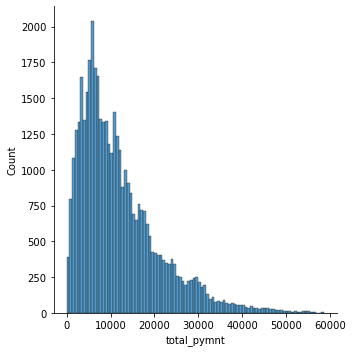

In [38]:
sns.displot(df_useful_dropped['total_pymnt'])

#### Payments received to date for total amount funded has a mode at around 10000 dollars, with the distribution being skewed to the right as seen from above plot

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

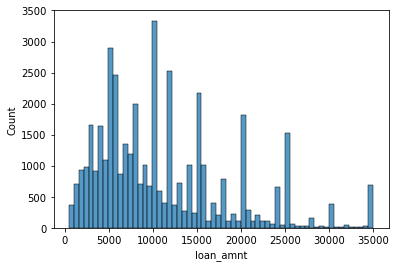

In [39]:
sns.histplot(data=df_useful_dropped, x='loan_amnt')

#### Listed loan amounts by the borrower generally has multiple modes, but is generally distributed in the lower ranges of < 20000 as seen from abnove plot

### Doing simple EDA via plotting barplots (with y being frequency) for categorical data that have about 10+ unique categories or less as EDA (because data with >10+ categories are hard to visualize on barplot)

In [41]:
object_col = list(df_useful_dropped.select_dtypes('object').columns)

impt_obj_col = []

for col in object_col:
    if (len(df_useful_dropped[col].value_counts())) <= 13:
        impt_obj_col.append(col)
impt_obj_col


['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan']

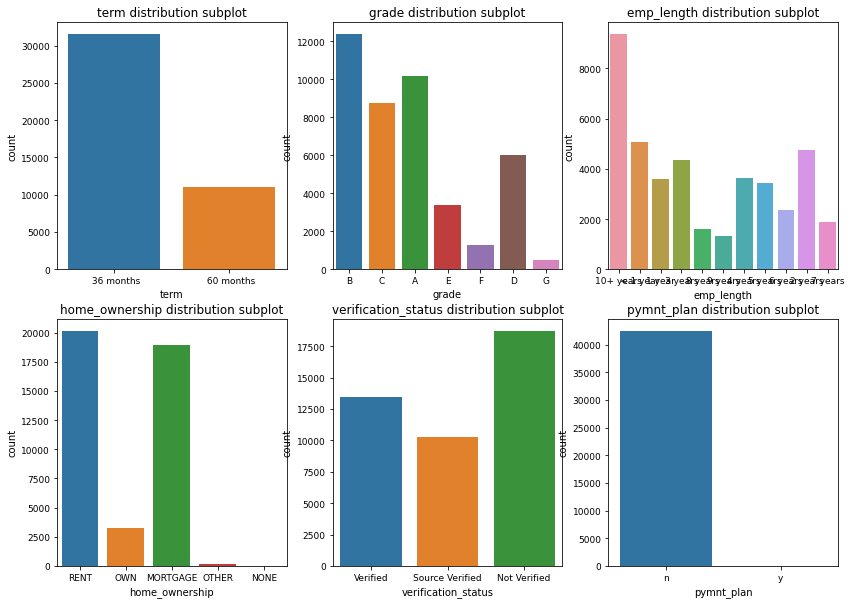

In [61]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,10))

for i, col in enumerate(impt_obj_col):
    plt.subplot(a, b, c)
    plt.title('{} distribution subplot'.format(col))
    plt.xlabel(i)
    ax = sns.countplot(x=df_useful_dropped[col])
    ax.tick_params(labelsize=9)
    c = c + 1

plt.show()

#### From the above EDA plots, we can see that: 1) Majority of the terms (payments on loan) are for 36 months as opposed to 60 months, 2) Majority of the assigned loan grades fall within the range of A to C, with grade B being the most common, 3) employment length is evenly spread for values of <10 years, but employment length of >10 yeares is the most frequent category, 4) A large majority of the home ownership types are of mortgage or rental types, 5) Verification status is rather evenly distributed across all 3 categories, albeit with incomes that are unverified by the lending club being the most frequent, 6) Only an insignificant number of loans (about 1) out of all loans has a payment plan put into place

### Do a pairplot matrix for our columns of float type to see both the histogram and bivariate plot of every pair of columns. Code below does a pairplot for 5 float columns, resulting in a 25 graph plot. We attempted to do for all float columns but it was too computationally intensive and time-consuming, hence the code included is only for the first 5 float columns.

In [68]:
float_col = list(df_useful_dropped.select_dtypes('float').columns)

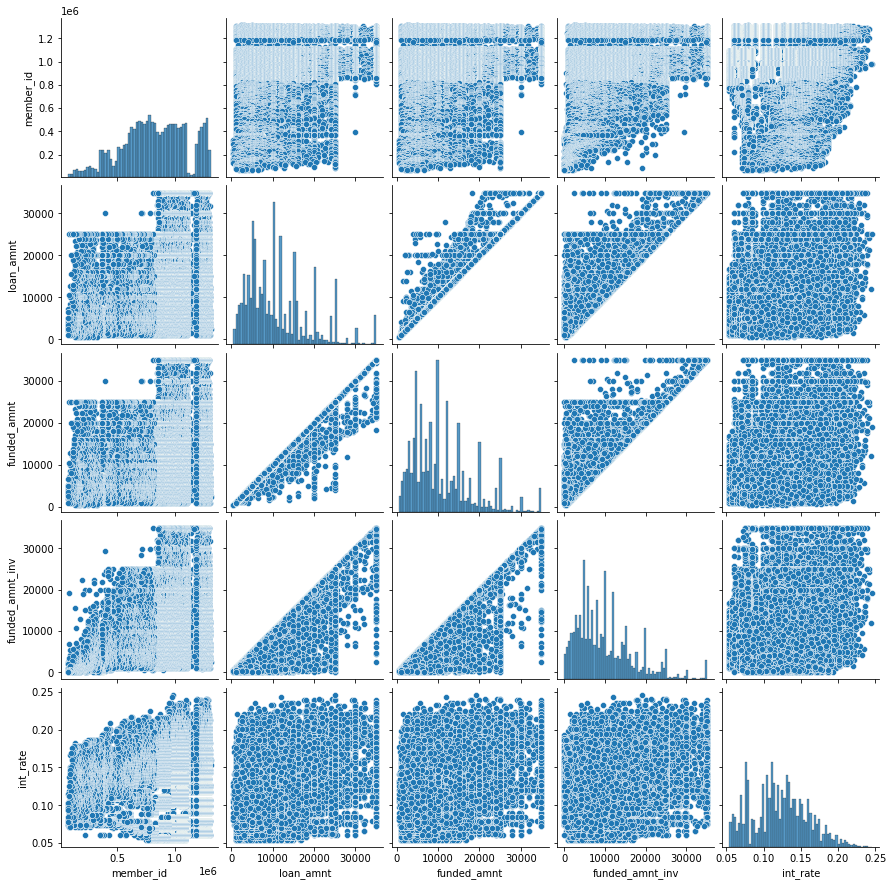

In [72]:
first_5_float_col_data = df_useful_dropped.filter(float_col[0:5])
sns.pairplot(first_5_float_col_data)

## More detailed EDA

### Do detailed plotting of distribution of credit grade via piechart

In [43]:
df_useful_dropped.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [44]:
grade_distr = df_useful_dropped[['grade', 'id']].groupby('grade').count()

In [45]:
grade_distr = grade_distr.rename({'id': 'Count'}, axis=1)
grade_distr = grade_distr.reset_index()

In [46]:
grade_distr

,grade,Count
0,A,10183
1,B,12389
2,C,8740
3,D,6016
4,E,3394
5,F,1301
6,G,512


#### From the below piechart, we can see that the assigned loan grades of A to C dominate the assigned loan grades with a proportion of about close to 75%, with the remaining grades of D to G taking up progressively lower proportions

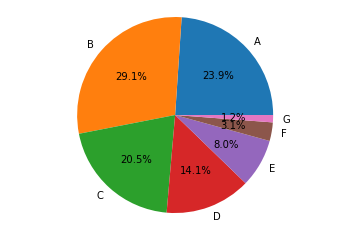

In [47]:
fig, ax = plt.subplots()
ax.pie(grade_distr.Count, labels=grade_distr.grade, autopct='%1.1f%%')
ax.axis('equal')
plt.show()

### Plot how loan_amnt changes with time using median and mean.

#### From the below lineplots of both median and mean loan amounts against issue dates, we can see that there is a general increasing trend of loan amounts issued as time progresses.

<AxesSubplot:xlabel='issue_d', ylabel='loan_amnt'>

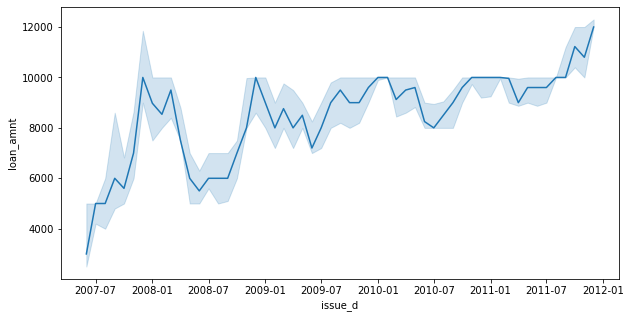

In [48]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_useful_dropped.issue_d, y = df_useful_dropped.loan_amnt, estimator=np.median)

<AxesSubplot:xlabel='issue_d', ylabel='loan_amnt'>

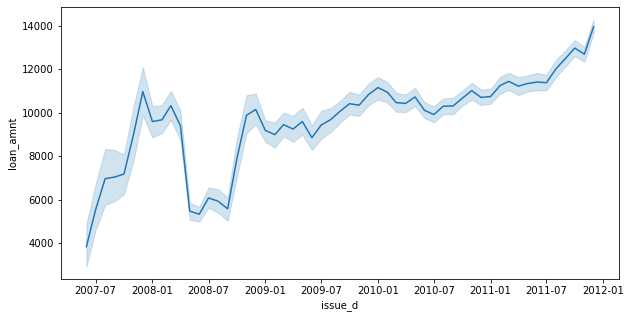

In [49]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_useful_dropped.issue_d, y = df_useful_dropped.loan_amnt, estimator=np.mean)

### Do boxplot to see whether there is a significant difference in terms of annual income between borrowers who have their loans fully paid vs charged off (borrower's ability to pay off deemed improbable by lender)

#### Surprisingly, there seems to be not much of a difference with regards to the annual income of borrowers between those who have fully paid off their loans and those who have their loans charged off

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

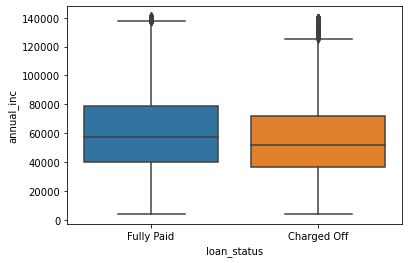

In [50]:
df_useful_dropped.groupby('loan_status')['loan_status'].count()
df_tmp = df_useful_dropped[(df_useful_dropped['loan_status'] == 'Fully Paid') | (df_useful_dropped['loan_status'] == 'Charged Off')]
df_tmp = df_tmp[df_tmp['annual_inc'].astype(float) < df_tmp['annual_inc'].quantile(0.95)]
sns.boxplot(x=df_tmp['loan_status'], y=df_tmp['annual_inc'])


### Do a more detailed barplot for loan amount vs employment length.

#### From the below barplot, there is an interesting trend that shows that  borrowers who have longer employment lengths tend to have higher loan amounts as well.

<AxesSubplot:xlabel='loan_amnt', ylabel='emp_length'>

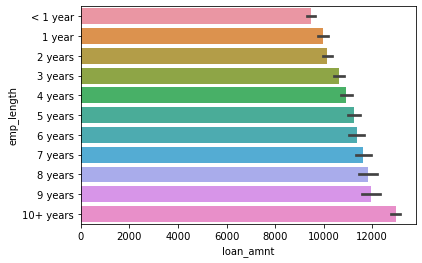

In [51]:
sns.barplot(x=df_useful_dropped['loan_amnt'], y=df_useful_dropped['emp_length'], order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                                                                        '6 years', '7 years', '8 years', '9 years', '10+ years'])

### Do a boxplot to see whether the loan amounts of borrowers who have different number of public record bankruptcies differ

#### From the below boxplot,it seems like the median, 25th percentile and 75th percentile loan amounts across borrowers with different number of public record bankruptcies do not differ much. However, the maximums (defined as Q3 + 1.5 * IQR) do differ here as seen from the top whisker of the boxplot

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='loan_amnt'>

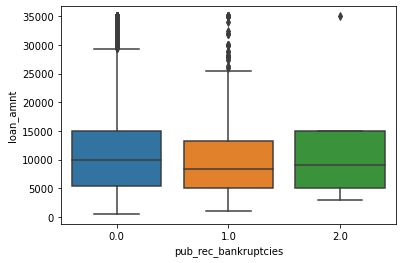

In [62]:
sns.boxplot(x=df_useful_dropped['pub_rec_bankruptcies'], y=df_useful_dropped['loan_amnt'])

### Do a boxplot to see whether the loan amounts of borrowers who have different types of home ownership differ

#### It seems like borrowers who have home ownership of type mortgage has the highest loan amounts in terms of the median loan amount. Borrowers who rent their house or own their house seem to have not much difference in terms of loan amounts

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

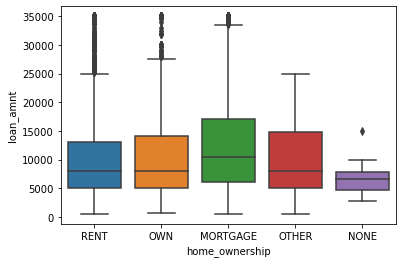

In [63]:
sns.boxplot(x=df_useful_dropped['home_ownership'], y=df_useful_dropped['loan_amnt'])

### Do a more detailed barplot for annual income vs annual income.

#### Surprisingly, it seems that the self-reported annual income increases as the loan credit gerade worsens. This might be caused by inaccurate reporting of annual income by the borrower.

<AxesSubplot:xlabel='grade', ylabel='annual_inc'>

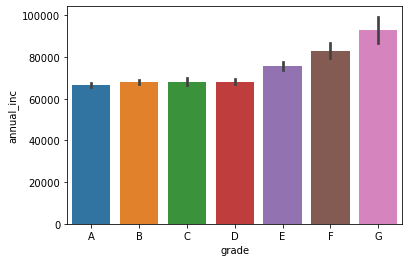

In [67]:
sns.barplot(y=df_useful_dropped['annual_inc'], x=df_useful_dropped['grade'], order = ['A', 'B', 'C', 'D', 'E', 'F', 
                                                                        'G'])